In [1]:
import pandas as pd

filepath = './../data/dataset_site_info.parquet'
df = pd.read_parquet(filepath)

df.head()

dataset_name  dataset_id  \
0  /JetHT/Run2016B-21Feb2020_ver2_UL2016_HIPM-v1/AOD     1553410   
1       /PAMinimumBias4/PARun2016C-PromptReco-v1/AOD      951505   
2  /GluGluToContinToZZTo2mu2nu_13TeV_MCFM701_pyth...     1114967   
3  /WJetsToLNu_HT-70To100_TuneCP5_13TeV-madgraphM...     1247050   
4    /HLTPhysics/Commissioning2017-PromptReco-v1/AOD      998897   

  replica_time_create      node_name      rep_size    min_time    max_time  \
0            20200619   T2_US_Purdue  2.570957e+10  2020-06-20  2020-12-31   
1            20171015     T2_IN_TIFR  2.668056e+13  2019-01-01  2020-06-10   
2            20200113      T2_FI_HIP  2.060427e+11  2020-01-14  2020-04-29   
3            20200323  T2_US_Caltech  1.034198e+13  2020-03-23  2020-05-05   
4            20200212  T2_EE_Estonia  1.705387e+11  2020-02-13  2020-03-25   

   br_user_group_id    tier  
0              42.0     AOD  
1              42.0     AOD  
2              42.0  AODSIM  
3              22.0  AODSIM  
4              42.0     AOD

In [2]:
site_list = df['node_name'].unique()

In [3]:
import re


def split_words(s):
    s = re.sub(r'[^0-9a-zA-Z]+', ' ', s)
    s = re.sub(r"([A-Z][a-z])", r" \1", s)
    return s.split()

In [4]:
df['words'] = df.dataset_name.apply(split_words)
df[['dataset_name', 'words']].head()

dataset_name  \
0  /JetHT/Run2016B-21Feb2020_ver2_UL2016_HIPM-v1/AOD   
1       /PAMinimumBias4/PARun2016C-PromptReco-v1/AOD   
2  /GluGluToContinToZZTo2mu2nu_13TeV_MCFM701_pyth...   
3  /WJetsToLNu_HT-70To100_TuneCP5_13TeV-madgraphM...   
4    /HLTPhysics/Commissioning2017-PromptReco-v1/AOD   

                                               words  
0  [JetHT, Run2016B, 21, Feb2020, ver2, UL2016, H...  
1  [PA, Minimum, Bias4, PA, Run2016C, Prompt, Rec...  
2  [Glu, Glu, To, Contin, ToZZ, To2mu2nu, 13, TeV...  
3  [W, Jets, ToL, Nu, HT, 70, To100, TuneCP5, 13,...  
4  [HLT, Physics, Commissioning2017, Prompt, Reco...

In [5]:
import itertools
import collections

total_list = []
word_df = pd.DataFrame(columns=('node_name', 'word_count'))
for s in site_list:
    word_list = list(itertools.chain(*list(df[df['node_name'] == s].words)))
    total_list.extend(word_list)
    word_df = word_df.append(
        {'node_name': s, 'word_count': collections.Counter(word_list)}, ignore_index=True)
total_counter = collections.Counter(total_list)
word_df.head()

node_name                                         word_count
0   T2_US_Purdue  {'JetHT': 197, 'Run2016B': 198, '21': 378, 'Fe...
1     T2_IN_TIFR  {'PA': 18, 'Minimum': 128, 'Bias4': 16, 'Run20...
2      T2_FI_HIP  {'Glu': 1371, 'To': 1672, 'Contin': 18, 'ToZZ'...
3  T2_US_Caltech  {'W': 1018, 'Jets': 3104, 'ToL': 1415, 'Nu': 3...
4  T2_EE_Estonia  {'HLT': 23, 'Physics': 12, 'Commissioning2017'...

In [6]:
def relative_frequency(word_dict):
    new_dict = collections.Counter()
    for k, v in word_dict.items():
        new_dict[k] = v/total_counter[k]
    return new_dict

In [7]:
word_df['word_frequency'] = word_df.word_count.apply(relative_frequency)
word_df.head()

node_name                                         word_count  \
0   T2_US_Purdue  {'JetHT': 197, 'Run2016B': 198, '21': 378, 'Fe...   
1     T2_IN_TIFR  {'PA': 18, 'Minimum': 128, 'Bias4': 16, 'Run20...   
2      T2_FI_HIP  {'Glu': 1371, 'To': 1672, 'Contin': 18, 'ToZZ'...   
3  T2_US_Caltech  {'W': 1018, 'Jets': 3104, 'ToL': 1415, 'Nu': 3...   
4  T2_EE_Estonia  {'HLT': 23, 'Physics': 12, 'Commissioning2017'...   

                                      word_frequency  
0  {'JetHT': 0.031641503372952136, 'Run2016B': 0....  
1  {'PA': 0.006068779501011463, 'Minimum': 0.0046...  
2  {'Glu': 0.007284725985908758, 'To': 0.00516792...  
3  {'W': 0.028955826720141083, 'Jets': 0.03081474...  
4  {'HLT': 0.00925181013676589, 'Physics': 0.0055...

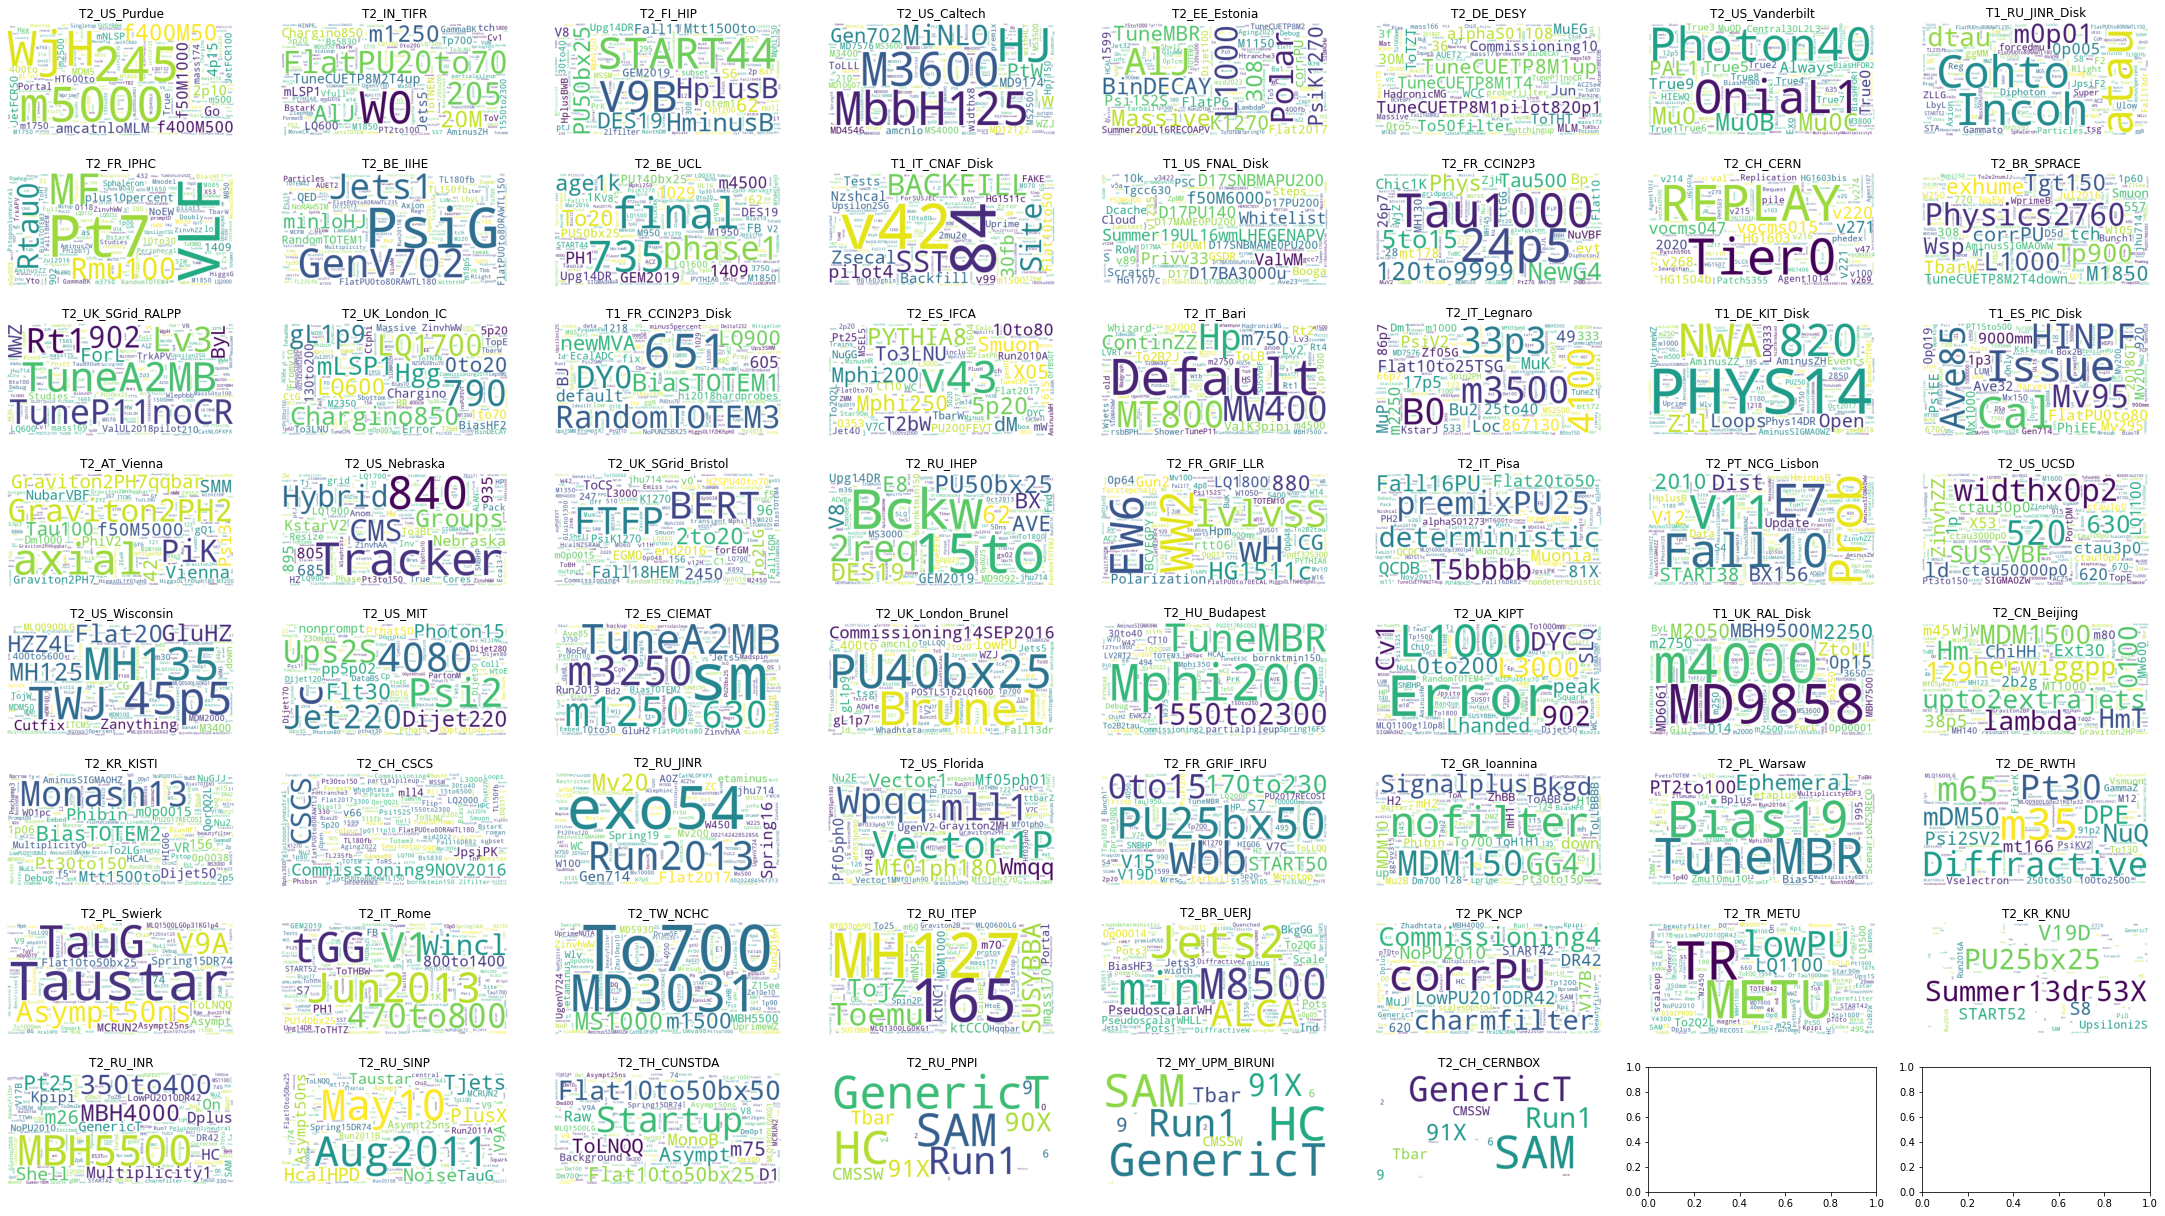

In [8]:
import pylab as plt
from wordcloud import WordCloud

fig, axs = plt.subplots(8, 8)
axs = axs.ravel()

for i, v in word_df['node_name'].items():
    word_cloud = WordCloud(background_color='white').generate_from_frequencies(
        word_df['word_frequency'].iloc[i])
    axs[i].imshow(word_cloud)
    axs[i].set_title(v)
    axs[i].axis('off')

fig.set_figwidth(38.4)
fig.set_figheight(21.6)
fig.savefig('./../data/wordcloud.png')